In [1]:
#  decimal type: used for finance；
#  =================================================
#  二进制转换为十进制  以及  十进制转换为二进制
#  pip install -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
#  清华大学镜像
#  >>> import site; site.getsitepackages()   显示macOS py第三方库安装路径
# Python开头的命令在终端失效，以为是环境变量的问题，实际名称是python3....... 
int('00100000',2),format(192,'b')from decimal import Decimal
num1 = Decimal('1.1')
num2 = Decimal('1.563')
num1 + num2  # Decimal('2.663')
#  使用context object可以调节精度
from decimal import getcontext
ctx = getcontext()
num = Decimal('1.1')
num**4  # Decimal('1.4641')
ctx.prec = 4 # set new precision
num**4  # Decimal('1.464')

from decimal import localcontext
num = Decimal("1.1")
with localcontext() as ctx:  #  with statement  
    ctx.prec = 2
    num**4  # Decimal('1.5')
num**4  # Decimal('1.4641')

#  =================================================
#  fraction type
from fractions import Fraction
num1 = Fraction(1, 3)
num2 = Fraction(1, 7)
num1 * num2  # Fraction(1, 21)
#  =================================================
#  complex type
z = 1 + 1j
z + 2  # 3 + 1j
z.conjugate()  # 1 - 1j

(1-1j)

1

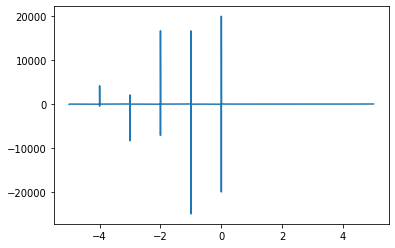

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

x = np.linspace(-5,5,100000)
ans = math.sqrt(Decimal(0.0225))
a = math.log(100,10)  #  log后边的 10 才是base！！
a1 = math.gamma(3.1)
plt.plot(x,gamma(x))
math.factorial(4)  #  阶乘
math.comb(5,3)  #  n choose k
math.gcd(100,50)  #  greatest common divisor
math.floor(0.1)
math.ceil(0.1)  #  floor and ceiling



In [3]:
class Polynomial:
    
    """Basic polynomial class""" # coffs是个list [1,2,3]:0次方系数为1 、 1次方系数为2 、 二次方系数为3
    def __init__(self, coeffs):  
        self.coeffs = coeffs
    def __repr__(self):
        return f"Polynomial({repr(self.coeffs)})"     # 用来显示这个多项式的
    def __call__(self, x):      # 就是给一个x 让算这个多项式的值嘛~~
        return sum(coeff*x**i for i, coeff  # i 是次方数
                in enumerate(self.coeffs))
    def differentiate(self):
        """Differentiate the polynomial and return the derivative"""
        coeffs = [i*c for i, c in enumerate(self.coeffs[1:],start=1)]  # index 默认 从 0 start
        return Polynomial(coeffs)
    def integrate(self, constant=0):
        """Integrate the polynomial, returning the integral"""
        coeffs = [float(constant)]
        coeffs += [c/i for i, c in enumerate(self.coeffs, start=1)]
        return Polynomial(coeffs)


In [4]:
p = Polynomial([1, -2, 1])
p.differentiate()
#  Polynomial([-2, 2])
p.integrate(constant=2)
#  Polynomial([2.0, 1.0, -1.0, 0.3333333333333333])
p.__call__(0)

1

In [5]:
# 要先sympy.symbols('x') 之后才能微分积分，很方便，以后积分不用谷歌了，直接sympy即可
import sympy
x = sympy.symbols('x')
f = (x**2 - 2*x)*sympy.exp(3 - x)
q = sympy.diff(f)
F = sympy.integrate(f,x)
print(f,'\n',q,'\n',sympy.simplify(q),'\n',F) # 显示第一个：原始函数 、第二个：微分后函数、第三个：合并同类项后函数

(x**2 - 2*x)*exp(3 - x) 
 (2*x - 2)*exp(3 - x) - (x**2 - 2*x)*exp(3 - x) 
 (x*(2 - x) + 2*x - 2)*exp(3 - x) 
 -x**2*exp(3 - x)


In [1]:
#  Solving Differential Equations  终于会解一维无限深势井的微分方程了！！
import sympy
x = sympy.symbols('x')
k = sympy.symbols('k')
m = sympy.symbols('m')
w = sympy.symbols('w')
h = sympy.symbols('h')
ξ = sympy.symbols('ξ')


f, g ,fi,T,fi0, v= sympy.symbols('f g fi T fi0 v', cls=sympy.Function)
#f(x).diff(x) #  符号状的 df(x)/dx
#T(x).diff(x)
#  𝑓″(𝑥)−2𝑓′(𝑥)+𝑓(𝑥)=sin(𝑥)  表示这个方程  
#diffeq = sympy.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sympy.sin(x))
# diffeq1 = sympy.Eq(fi(x).diff(x,x),-k**2*fi(x))  
#diffeq2 = sympy.Eq(T(x).diff(x),-k*T(x))  #  导热方程
#diffeq3 = sympy.Eq(fi0(x).diff(x),-m*w*x/h*fi0(x)) #  griff量子力学58页微分方程
#diffeq4 = sympy.Eq(fi(ξ).diff(ξ,ξ),ξ**2*fi(ξ)) #  griff量子力学63页微分方程
# diffeq5 = sympy.Eq(v(x).diff(x),k*x) #  dv/dx = kx  弹簧x方向拉力=势能x方向梯度
diffeq6 = sympy.Eq(fi(ξ).diff(ξ,ξ)-ξ**2*fi(ξ),0)

#de_ans = sympy.dsolve(diffeq, f(x))
# de_ans1 = sympy.dsolve(diffeq1, fi(x))
#de_ans2 = sympy.dsolve(diffeq2, T(x))
# de_ans3 = sympy.dsolve(diffeq3, fi0(x))  #  正确！
# de_ans4 = sympy.dsolve(diffeq4, fi(ξ))  #  不符合
# de_ans5 = sympy.dsolve(diffeq5, v(x))  #  正确
de_ans6 = sympy.dsolve(diffeq6, fi(ξ))
de_ans6


Eq(fi(ξ), C2*(ξ**4/12 + 1) + C1*ξ*(ξ**4/20 + 1) + O(ξ**6))

In [7]:
import sympy
from sympy import oo
x = sympy.symbols('x')
f = x*(x - 2)*sympy.exp(3 - x)  #  
ans1 = sympy.solve(f,x)
#  =======以上简单解法=======
#  AP math86页用scipy 两种方法使用牛顿法解方程 繁琐


In [8]:
#  sympy除了analytical积分；还可以numerical积分给出积分上下限即可
#ans2 = sympy.integrate(x**2,(x,-1,+1))
#ans2 = sympy.integrate(sympy.exp(-x**2),(x,-1,+1))
#sympy.N(ans2)  #  还可以让其变成数值


In [4]:
#  Solving systems of differential equations  解微分方程组！！
import sympy
from sympy.solvers.ode.systems import dsolve_system

t = sympy.symbols('t')
ξ = sympy.symbols('ξ')
P, W, f= sympy.symbols('P W f', cls=sympy.Function)

# eq1 = sympy.Eq(P(t).diff(t), 5*P(t)-0.1*W(t)*P(t))
# eq2 = sympy.Eq(W(t).diff(t), 0.1*P(t)*W(t)-6*W(t))  #  sympy解不了，估计要scipy
# eq1 = sympy.Eq(P(t).diff(t), 5*P(t))
# eq2 = sympy.Eq(W(t).diff(t), 6*W(t))


# eqs = [eq1,eq2]
# ans = dsolve_system(eqs,ics={P(0): 85, W(0): 40})
#  dsolve_system(eqs, ics={f(0): 1, g(0): 0})  #  可以加入初始条件



[[Eq(f(ξ), C2 + C2*ξ**4/12 + C1*ξ + C1*ξ**5/20 + O(ξ**6))]]

In [23]:
#  使用sympy积分，算<x> <p>期望值
#  integrate(f, (x, a, b)) returns the definite integral==>  integrate(x**2 + x + 1, x)
#  多加几个限定就可以了，<x>确实是a/2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import sympy
x = sympy.symbols('x',nonzero=True)
a = sympy.symbols('a',nonzero=True)
n = sympy.symbols('n',integer = True,nonzero=True)
f = x*(2/a*sympy.sin(n*sympy.pi*x/a)**2)
ans = sympy.integrate(f,(x,0,a))
#  <x> = a/2



In [30]:
#  算<x**2>值  正确！！
import sympy
x = sympy.symbols('x',nonzero=True,real=True)
a = sympy.symbols('a',nonzero=True,real=True)
n = sympy.symbols('n',integer = True,nonzero=True)
f = x**2*(2/a*sympy.sin(n*sympy.pi*x/a)**2)
ans = sympy.integrate(f,(x,0,a))
#  得出<x**2> 的值，正确！！！


In [33]:
sympy.diff(sympy.sin(x),x)

cos(x)

In [47]:
from sympy import conjugate , I, pi,sin,exp
#  https://www.youtube.com/watch?v=eQggHzwJLJU&list=PLKxxVVdhQNB6EmcVXk_sqBPp8wf_fBjxP&index=17&ab_channel=HayashiManabu
#  计算<x>   已知  φ(x,t)  problem2.5c
x = sympy.symbols('x',nonzero=True,real=True)
a = sympy.symbols('a',nonzero=True,real=True)
t = sympy.symbols('t',nonzero=True,real=True)
f1 = x*sin(pi*x/a)**2
f2 = x*sin(2*pi*x/a)**2
f3 = x*sin(pi*x/a)*sin(2*pi*x/a)

ans1 = sympy.integrate(f1,(x,0,a))  #  a**2/4  正确
ans2 = sympy.integrate(f2,(x,0,a))  #  正确
ans3 = sympy.integrate(f3,(x,0,a))  #  正确



In [53]:
ans4

-a**6/(18*pi**2)

In [56]:
#  griff量子力学problem 2.7
A = sympy.symbols('A',nonzero=True,real=True)
a = sympy.symbols('a',nonzero=True,real=True)
x = sympy.symbols('x',nonzero=True,real=True)
f1 = A*x
f2 = A*(a-x)

ans1 = sympy.integrate(f1**2,(x,0,a/2))  #  a**2/4  正确
ans2 = sympy.integrate(f2**2,(x,a/2,a))  #  正确
ans3 = ans1+ans2


In [57]:
ans3

A**2*a**3/12

In [13]:
#==================================================积分求解==============================================================================================
#  griff量子力学problem 2.7 第二问； 2.8
#  证明一维无限深势井φm φn 正交 (积分f4==答案ans4)
#  验证exp2.248页 f5==>ans5
import sympy
from sympy import oo
m = sympy.symbols('m',integer=True,nonzero=True,real=True)
n = sympy.symbols('n',integer=True,nonzero=True,real=True,positive=True)
a = sympy.symbols('a',nonzero=True,real=True,positive=True)
x = sympy.symbols('x',nonzero=True,real=True)
y = sympy.symbols('y',nonzero=True,real=True)
r = sympy.symbols('r',nonzero=True,real=True)
λ = sympy.symbols('λ',nonzero=True,real=True)
A = sympy.symbols('A',nonzero=True,real=True)
θ = sympy.symbols('θ',nonzero=True,real=True)

w = sympy.symbols('w',nonzero=True,real=True)
h = sympy.symbols('h',nonzero=True,real=True,positive=True)
k = sympy.symbols('k',nonzero=True,real=True,positive=True)
i = sympy.symbols('i',nonzero=True,complex=True)

# f1 = x*sympy.sin(m*sympy.pi*x/a)
# f2 = (a-x)*sympy.sin(m*sympy.pi*x/a)
# f3 = sympy.sin(sympy.pi*x/a)
# f4 = 2/a*sin(m*pi*x/a)*sin(n*pi*x/a)
# f5 = sin(n*pi*x/a)*sympy.sqrt(30/a**5)*x*(a-x)
# f6 = (2*m*w/h*x**2-1)*sympy.exp(-m*w*x**2/h)
# f7 = x**2*sympy.exp(-k*x**2)
# f8 = y**2*sympy.exp(-y**2)
# f9 = 1+4*x*y
# f10 = 3*x**2-3*x*y**2
f11 = 3*x**2-3*x*y**2




# ans1 = sympy.integrate(f1,(x,0,a/2))  #  对了！
# ans2 = sympy.integrate(f2,(x,a/2,a))  #  存疑
# ans3 = sympy.integrate(f3,(x,0,a/2))
# ans4 = sympy.integrate(f4,(x,0,a))  #  完美 m=n 为1 不等于为 0
# ans5 = sympy.integrate(f5,(x,0,a))
# ans3 = ans3*2/a  #  2/pi  对了！
# ans5 = ans5*sympy.sqrt(2/a)  #  正确 但n为奇数需要人工化简
# ans6 = sympy.integrate(f6,(x,-oo,oo))
# ans7 = sympy.integrate(f7,(x,-oo,oo))
# ans8 = sympy.integrate(f8,(y,-oo,oo))
# ans9 = sympy.integrate(f9,(x,0,1),(y,1,3))#  二重积分
#ans10 = sympy.integrate(f10,(y,x**2,2*x),(x,0,2))#  二重积分 先积分y；后积分x
ans11 = sympy.integrate(f11,(x,y/2,sympy.sqrt(y)),(y,0,4))#  二重积分，先积分x，后积分y


In [10]:
ans11

-72/5

In [14]:
#=======================================================微分方程求解=========================================================================================
# #  Solving Differential Equations  终于会解一维无限深势井的微分方程了！！
import sympy
#x = sympy.symbols('x')
k = sympy.symbols('k')
f, g ,fi= sympy.symbols('f g fi', cls=sympy.Function)
f(x).diff(x) #  符号状的 df(x)/dx

#  𝑓″(𝑥)−2𝑓′(𝑥)+𝑓(𝑥)=sin(𝑥)  表示这个方程
#diffeq = sympy.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sympy.sin(x))
diffeq1 = sympy.Eq(fi(x).diff(x,x),-k**2*fi(x))
#de_ans = sympy.dsolve(diffeq, f(x))
de_ans1 = sympy.dsolve(diffeq1, fi(x))


-72/5

In [9]:
eq

Eq(-Derivative(u(x, t), (t, 2)) + Derivative(u(x, t), x), 0)